# Deepak_Kishore_Tanuku_Mini_Project_2

**<font color=blue > Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

**<font color=blue > Reading the Data**

In [2]:
house_df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')

house_df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


**<font color=blue > Columns**

In [3]:
house_df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

**<font color=blue > Data Info**

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


**<font color=blue > Column Datatype**

In [5]:
house_df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

**<font color=blue > Summary**

In [7]:
house_df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


**<font color=blue > Structure of Dataset**

In [8]:
house_df.shape

(3000, 14)

**<font color=blue > Checking for Null Values**

In [6]:
house_df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

### **<font color=color > Exploratory Data Analysis - EDA**

In [7]:
house_df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


**<font color=color > Distibution of Area and Prices**

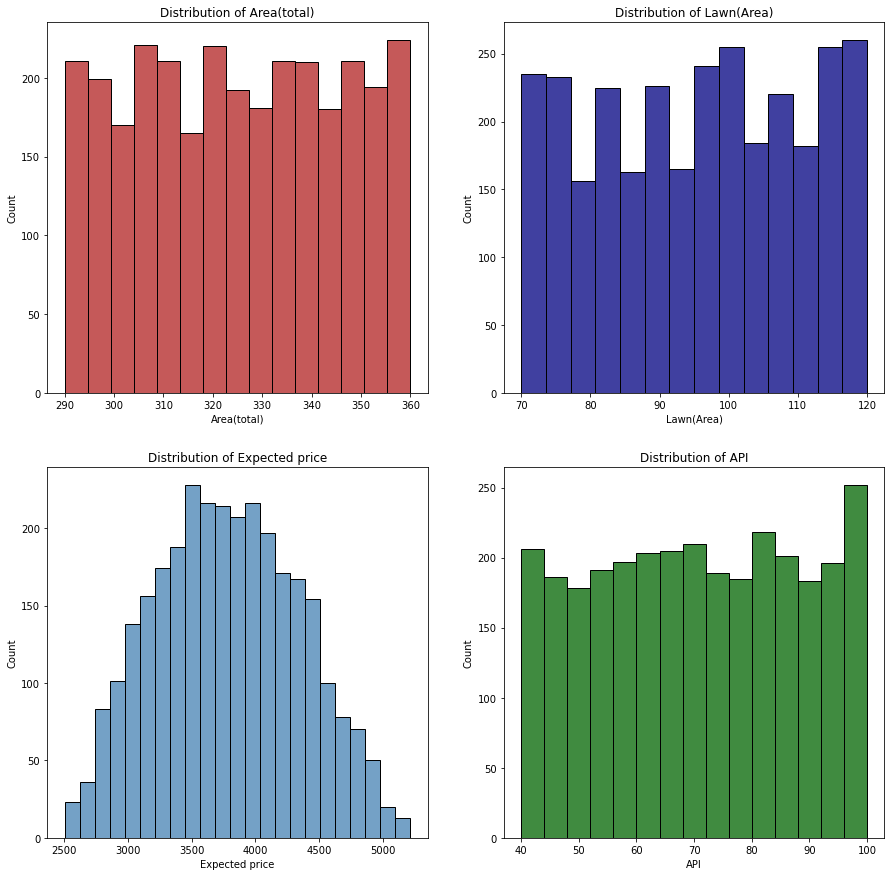

In [8]:
cols = ['Area(total)','Lawn(Area)','Expected price','API']
color = ['firebrick','navy','steelblue','darkgreen']

plt.figure(figsize=(15,15))
for i in enumerate(zip(cols,color)):
    plt.subplot(2,2,i[0]+1)
    sb.histplot(x=i[1][0],data=house_df,color=i[1][1])
    plt.title('Distribution of '+i[1][0])

* Expected Price of Most of the Houses are distributed between 3400 and 4200.
* Air Pollution Index is equally Distributed over all values.
* Most of the Houses have Total Area between 330 to 360.
* Houses with Lawn Area between 95 and 120 are more in number.

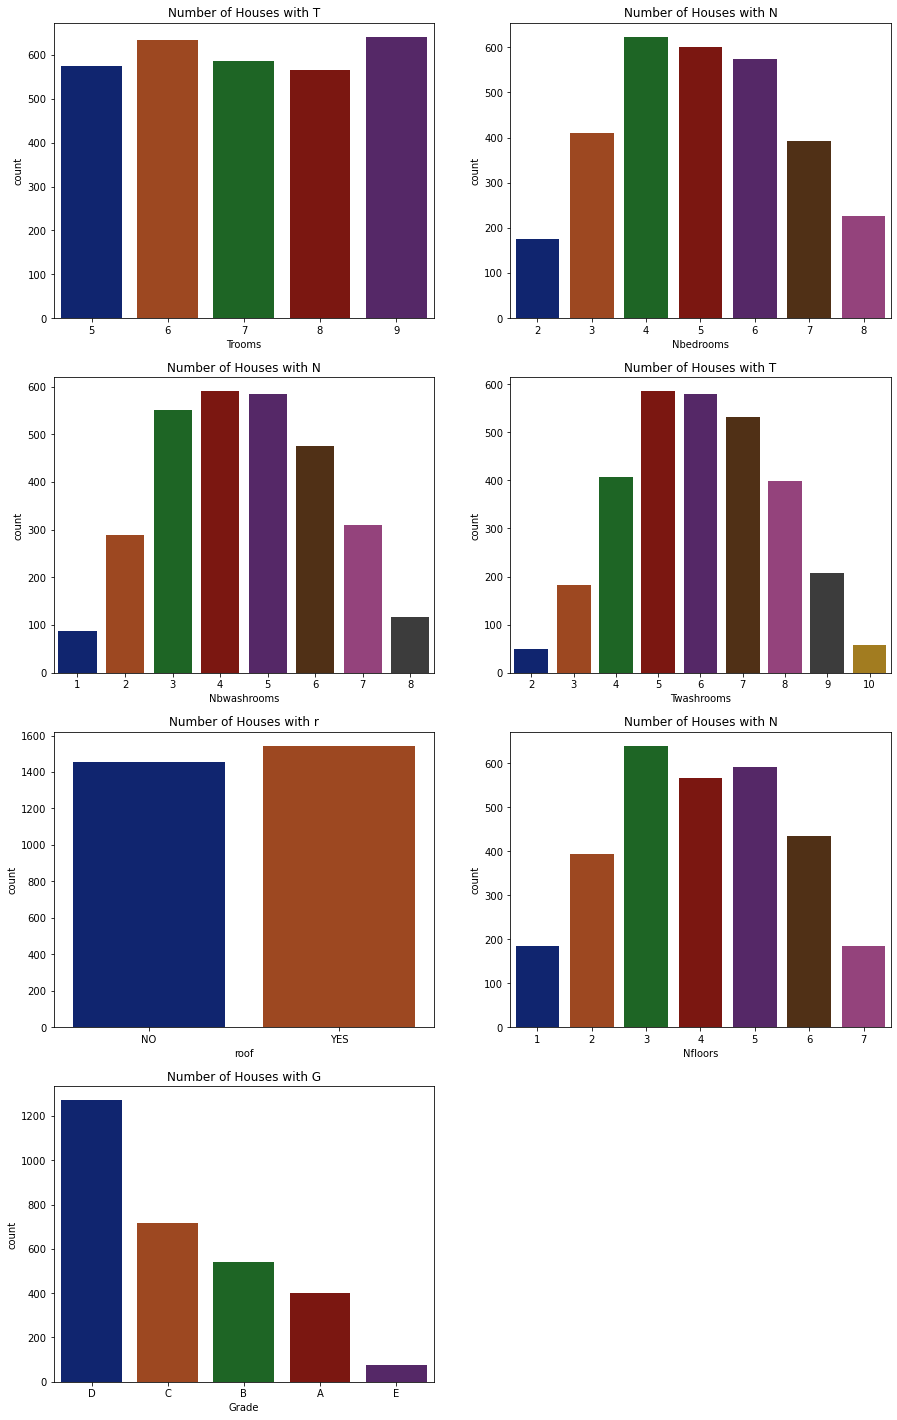

In [9]:
cols = ['Trooms','Nbedrooms','Nbwashrooms','Twashrooms','roof','Nfloors','Grade']
#color = ['firebrick','navy','steelblue','darkgreen']

plt.figure(figsize=(15,25))
for i in enumerate(cols):
    plt.subplot(4,2,i[0]+1)
    sb.countplot(x=i[1],data=house_df,palette='dark')
    plt.title('Number of Houses with '+i[1][0])

* Most of the Houses have Total Rooms of 9 and Houses with Total Number of Washrooms as 5.
* Most of Houses have 4 bedrooms and 4 bathrooms.
* Most of the Houses are of 3rd Floor and least are of 1st Floor.
* Houses which have Roof are more.
* Based on Grade most of Houses are of Grade D and least in Grade E.

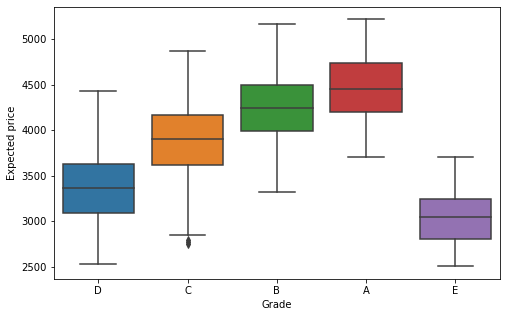

In [10]:
plt.figure(figsize=(8,5))
sb.boxplot(x='Grade',y='Expected price',data=house_df)
plt.show()

* Grade C has wide range of Spread of Expected Price.

**<font color=blue > Expected Price vs Total Area**

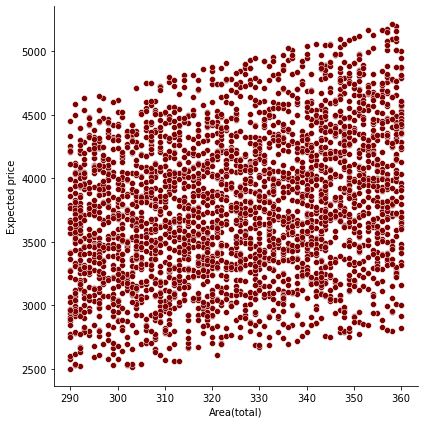

In [11]:
sb.relplot(x='Area(total)',y='Expected price',data=house_df,height=6,color='maroon')
plt.show()

* Area of House and Expected Price are propotional to each other. Prices increasing with Area of House.

**<font color=blue > Expected Price vs Total Rooms**

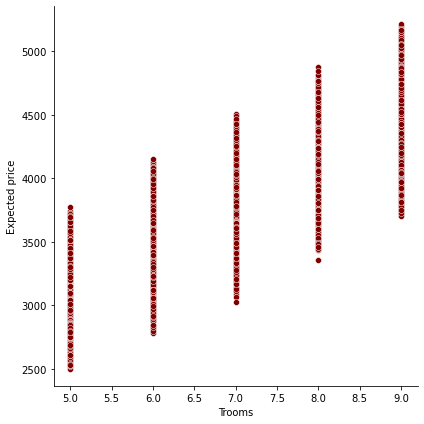

In [12]:
sb.relplot(x='Trooms',y='Expected price',data=house_df,height=6,color='maroon')
plt.show()

* As the Total Rooms are increase there is an increase in Expected Price.

**<font color=blue > Expected Price vs Total Area Grade wise**

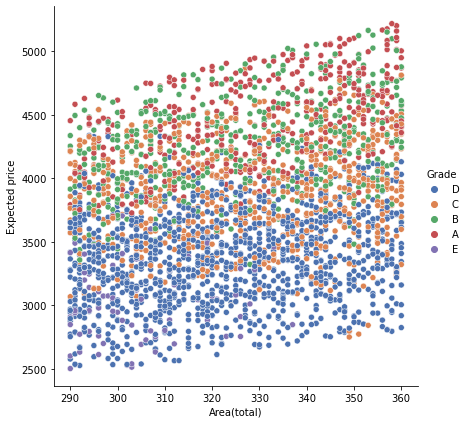

In [13]:
sb.relplot(x='Area(total)',y='Expected price',hue='Grade',data=house_df,height=6,palette='deep')
plt.show()

* All Houses of Grades are distributed evenly and with respective Expected Price and Area.

**<font color=blue > Pairplot**

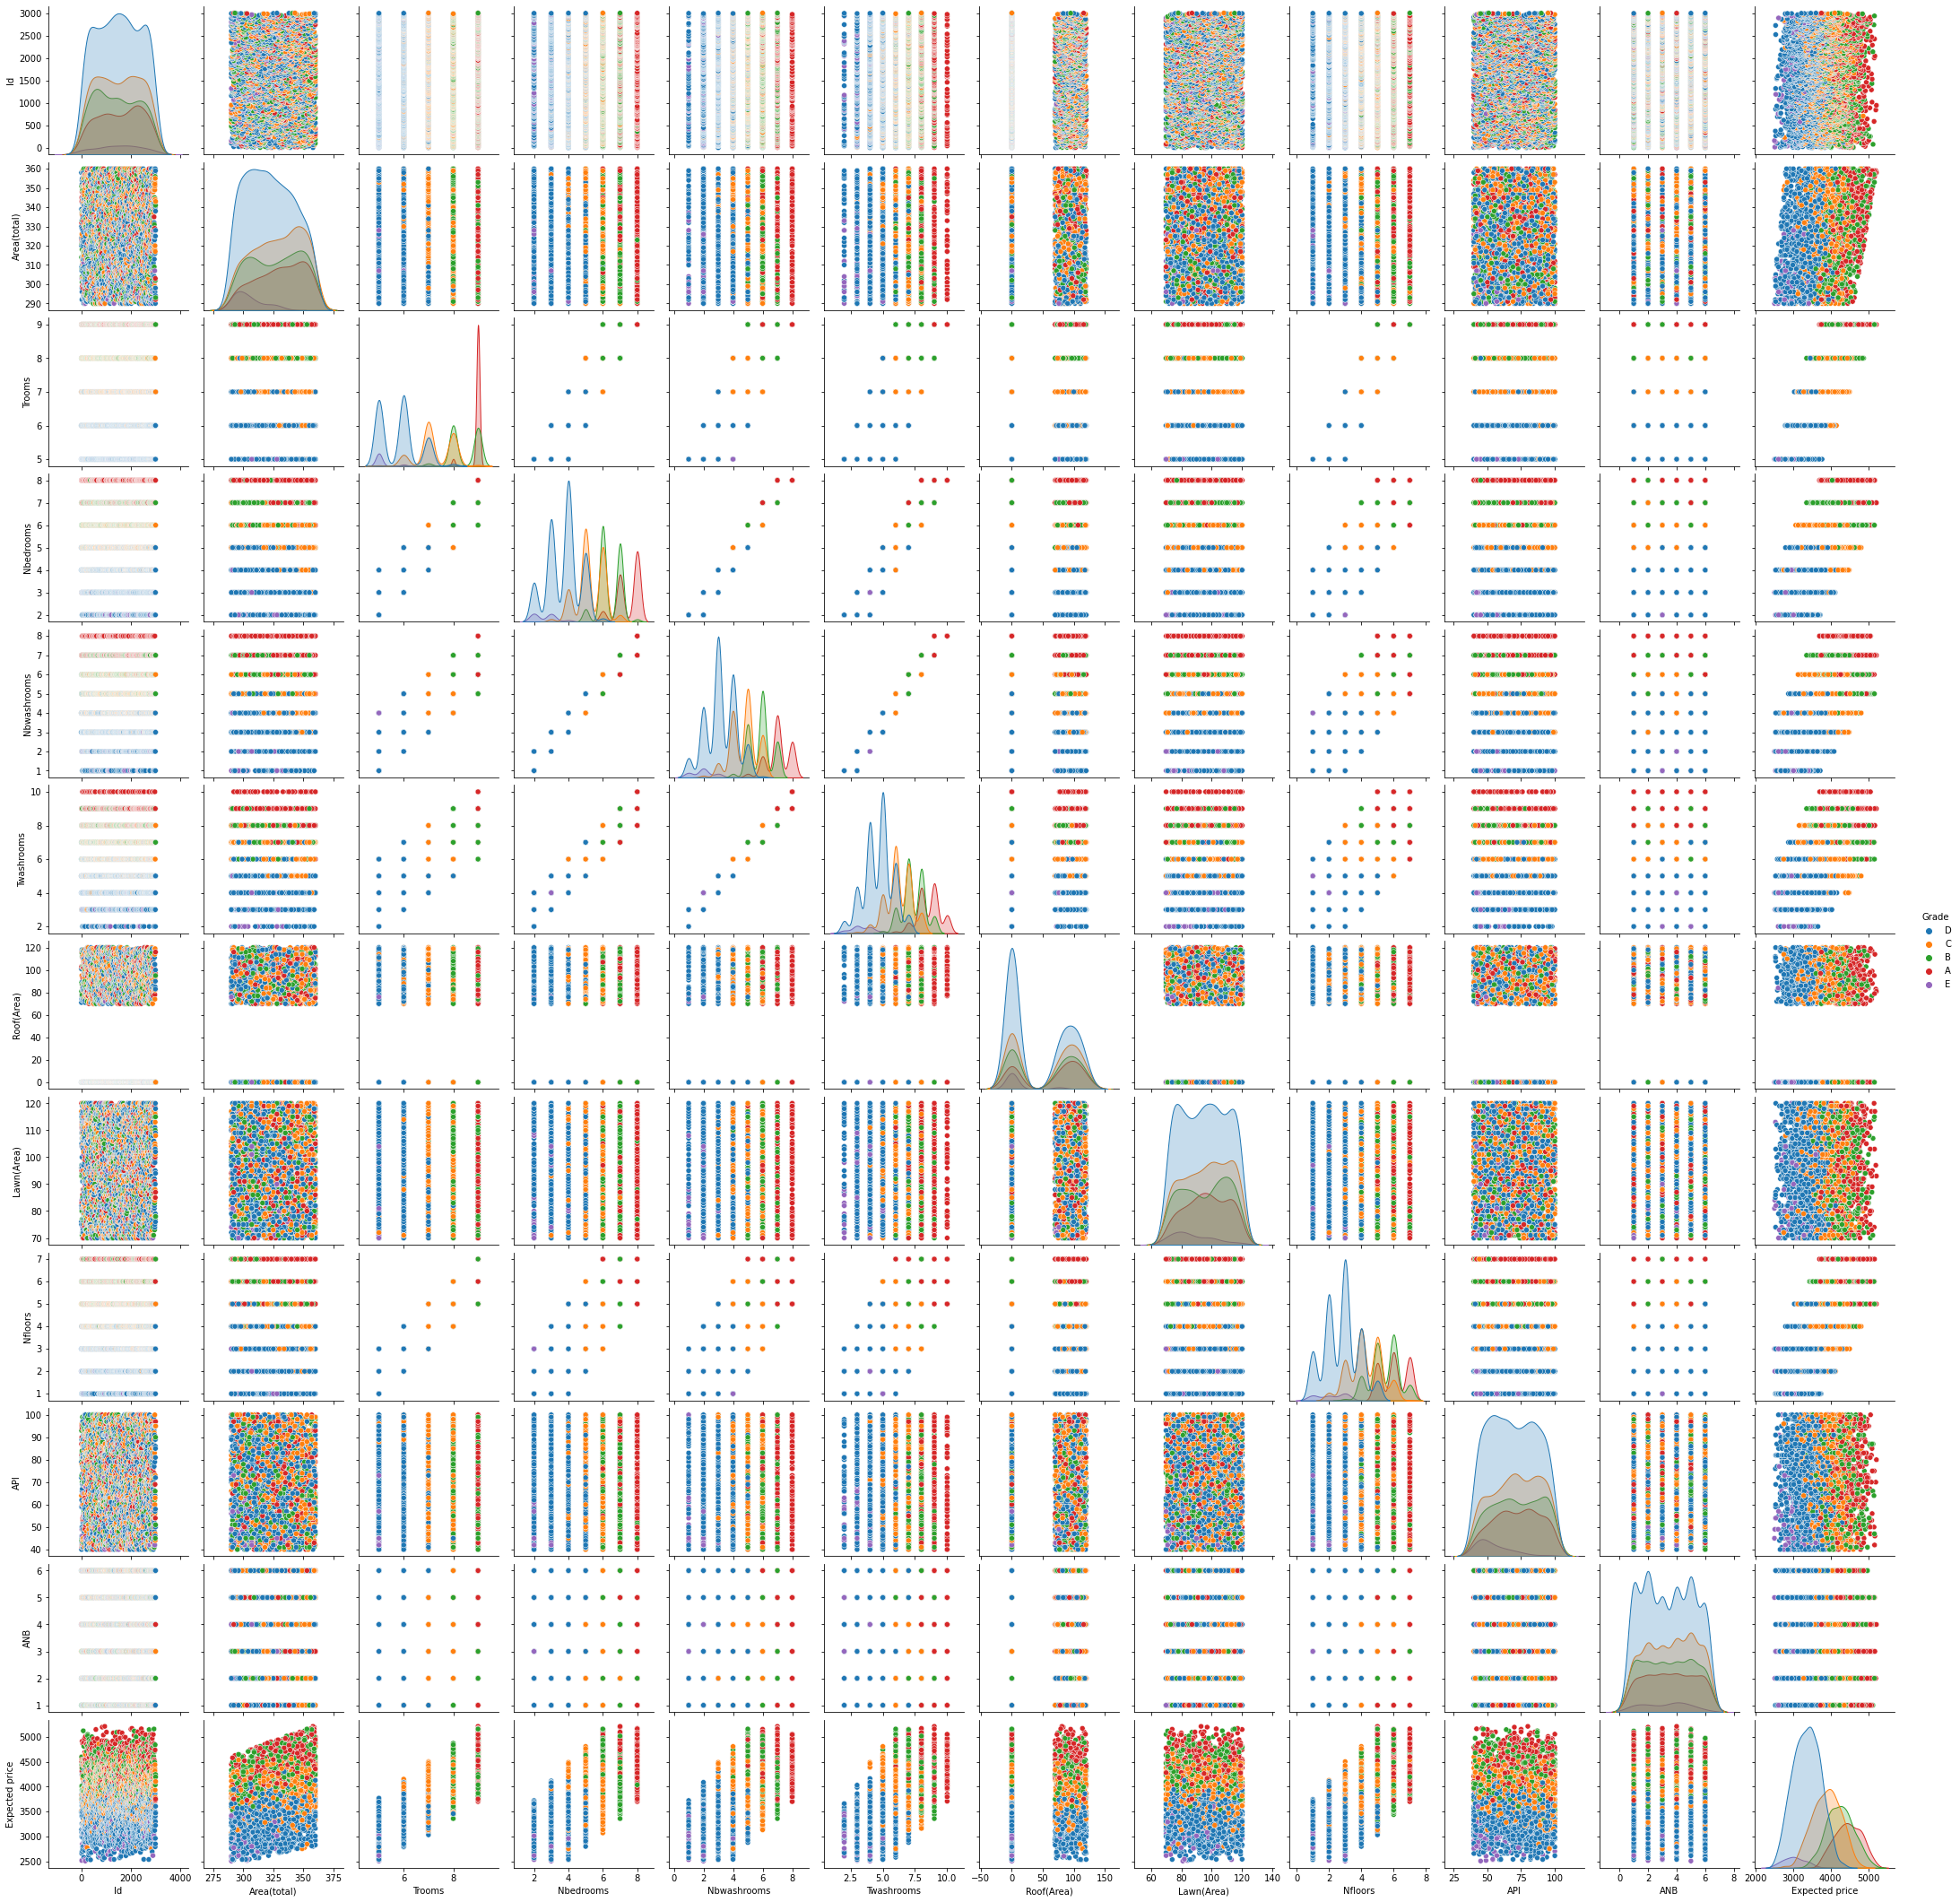

In [14]:
sb.pairplot(house_df,hue='Grade')
plt.show()

**<font color=blue > Converting Object to Category**

In [15]:
new_df = house_df.select_dtypes('object')
for i in new_df.columns:
    house_df[i]=house_df[i].astype('category')

**<font color=blue > Converting Categorical to Numerical using Label Encoder**

In [16]:
for i in new_df.columns:
    house_df[i] = LabelEncoder().fit_transform(house_df[i])

**<font color=blue > Feature Selection**

<AxesSubplot:>

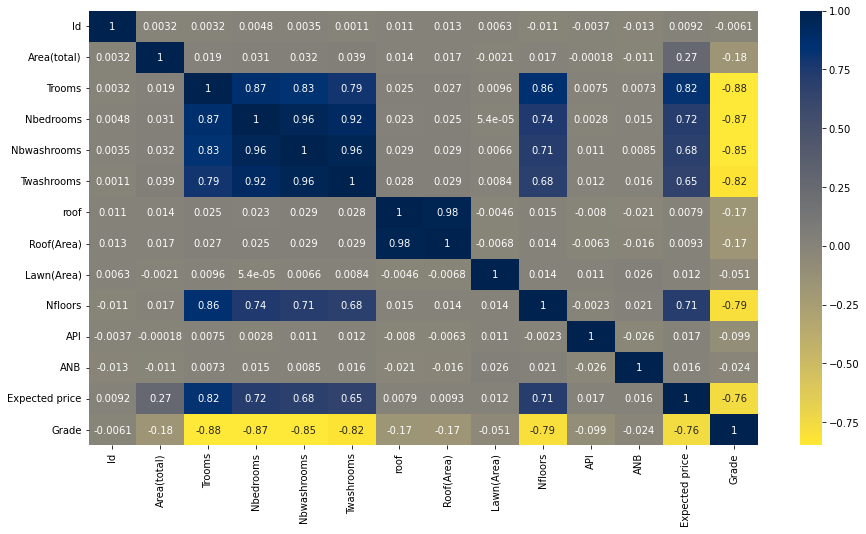

In [17]:
plt.figure(figsize=(15,8))
sb.heatmap(house_df.corr(),annot=True,robust=True,cmap='cividis_r')

**<font color=blue > Splitting of Dependent and Independent Data**

In [18]:
x = house_df[['Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms','Nfloors','Expected price']]
y = house_df['Grade']

**<font color=blue > Scaling of Data**

In [19]:
for i in x.columns:
    x[i]=MinMaxScaler().fit_transform(x[i].to_numpy().reshape(-1,1))

**<font color=blue > Dimensionality Reduction using Linear Discriminant Analysis (LDA)**

In [20]:
LDA = LinearDiscriminantAnalysis
x = LDA(n_components=2).fit_transform(x,y)

In [21]:
print(x)

[[-1.39262495  0.9006524 ]
 [-2.56771688  1.52222359]
 [-0.06007289 -0.12993604]
 ...
 [-0.6961401  -1.29999117]
 [ 3.5696477  -0.01122906]
 [ 1.25138084  1.72735158]]


**<font color=blue > Splitting of Data using StratifiedKFold**

In [22]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=22)

for train_index, test_index in skf.split(x,y):
    train_index = train_index
    test_index = test_index

**<font color=blue > Splitting of Train and Test Data**

In [23]:
x_train = x[train_index]
y_train = y[train_index]
x_test = x[test_index]
y_test = y[test_index]

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2400, 2) (2400,) (600, 2) (600,)


## **<font color=maroon > Naive Bayes Classifier**

**<font color=blue > Model Building and Fitting the Data**

In [24]:
model_1 = GaussianNB()

model_1.fit(x_train,y_train)

GaussianNB()

**<font color=blue > Model Performance on Train Data**

In [25]:
m1_train_score = round(model_1.score(x_train,y_train),3)
print('Performance of Model on Train Data: ',m1_train_score)

Performance of Model on Train Data:  0.808


**<font color=blue > Model Performance on Test Data**

In [26]:
m1_test_score = round(model_1.score(x_test,y_test),3)
print('Performance of Model on Train Data: ',m1_test_score)

Performance of Model on Train Data:  0.795


**<font color=blue > Predicting the Data**

In [27]:
pred_1 = model_1.predict(x_test)

pred_1

array([3, 2, 3, 3, 1, 2, 0, 3, 0, 3, 3, 3, 0, 2, 0, 2, 2, 2, 2, 0, 1, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3,
       0, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 0, 3, 2, 3, 2, 2,
       2, 3, 0, 1, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 0, 3, 2, 2, 2, 3, 2,
       2, 3, 1, 1, 0, 2, 0, 0, 2, 2, 3, 1, 1, 2, 2, 1, 0, 2, 3, 3, 3, 1,
       0, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3,
       2, 1, 3, 3, 0, 0, 1, 3, 3, 2, 0, 3, 2, 1, 0, 1, 0, 3, 1, 1, 2, 1,
       3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3,
       3, 0, 1, 2, 0, 3, 0, 3, 2, 1, 0, 3, 0, 1, 2, 0, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 3, 2, 1, 1, 1, 2, 0, 2, 3, 1, 3, 1, 0, 2, 3, 1, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 1, 2, 0, 0, 1, 3, 0, 2, 3, 3, 3, 3, 1, 2, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 0, 2, 3, 3, 2, 1, 3,
       1, 3, 2, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 1, 2, 3, 1, 3,
       3, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2,

**<font color=blue > Evaluation of Model**

**<font color=blue > Defining the Model for Evaluation**

In [28]:
def metric_scores(actual,pred):
    acc = round(accuracy_score(actual,pred),3)
    precision = round(precision_score(actual,pred,average='weighted'),3)
    f1 = round(f1_score(actual,pred,average='weighted'),3)
    recall = round(recall_score(actual,pred,average='weighted'),3)
    return(acc,precision,f1,recall)

**<font color=blue > Calculation of Metric Scores**

In [29]:
accu_1,precision_1,f1_1,recall_1 = metric_scores(y_test,pred_1)

print("Accuracy Score: ",accu_1)
print("Precision Score: ",precision_1)
print("F1 Score: ",f1_1)
print("Recall Score: ",recall_1)

Accuracy Score:  0.795
Precision Score:  0.774
F1 Score:  0.782
Recall Score:  0.795


**<font color=blue > Cross Validation**

**<font color=blue > Defining Function for Cross Validation**

In [30]:
def cross_val_metrics(model,cv):
    r2 = round(cross_val_score(model,x,y,cv=cv,scoring='r2',n_jobs=-1).mean(),3)
    accu = round(cross_val_score(model,x,y,cv=cv,scoring='accuracy',n_jobs=-1).mean(),3)
    precision = round(cross_val_score(model,x,y,cv=cv,scoring='precision_weighted',n_jobs=-1).mean(),3)
    f1 = round(cross_val_score(model,x,y,cv=cv,scoring='f1_weighted',n_jobs=-1).mean(),3)
    recall = round(cross_val_score(model,x,y,cv=cv,scoring='recall_weighted',n_jobs=-1).mean(),3)
    return(r2,accu,precision,f1,recall)

**<font color=blue > Cross Validation Calculation**

In [31]:
m1_cv_r2, m1_cv_accu, m1_cv_precision, m1_cv_f1, m1_cv_recall = cross_val_metrics(model_1,skf)

print("R2: ",m1_cv_r2)
print("CV Accuracy Score: ",m1_cv_accu)
print("CV Precision Score: ",m1_cv_precision)
print("CV F1 Score: ",m1_cv_f1)
print("CV Recall Score: ",m1_cv_recall)

R2:  0.841
CV Accuracy Score:  0.804
CV Precision Score:  0.784
CV F1 Score:  0.793
CV Recall Score:  0.804


## **<font color=maroon > Random Forest Classifier**

**<font color=blue > Checking for the Best Parameters using Grid Search CV**

In [32]:
model = RandomForestClassifier()

In [33]:
parameters = {'n_estimators':[120,140,160,180,200],'max_depth':[6,7,8,9,10],'criterion' :['gini', 'entropy']}

In [34]:
GS = GridSearchCV(model, param_grid = parameters, n_jobs=-1, cv=skf).fit(x_train,y_train)

In [35]:
GS.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=160)

**<font color=blue > Model Building and Fitting the Data**

In [36]:
model_2 = RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=120)

model_2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=120)

**<font color=blue > Model Performance on Train Data**

In [37]:
m2_train_score = round(model_2.score(x_train,y_train),3)
print('Performance of Model on Train Data: ',m2_train_score)

Performance of Model on Train Data:  0.839


**<font color=blue > Model Performance on Test Data**

In [38]:
m2_test_score = round(model_2.score(x_test,y_test),3)
print('Performance of Model on Train Data: ',m2_test_score)

Performance of Model on Train Data:  0.802


**<font color=blue > Predicting the Data**

In [39]:
pred_2 = model_2.predict(x_test)

pred_2

array([3, 2, 3, 3, 1, 2, 0, 3, 0, 3, 3, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3,
       0, 3, 1, 2, 3, 3, 3, 3, 2, 3, 0, 0, 1, 3, 1, 2, 0, 3, 2, 3, 2, 2,
       2, 3, 0, 1, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2, 2, 3, 2,
       2, 3, 1, 1, 0, 2, 0, 0, 2, 2, 3, 1, 1, 2, 2, 1, 0, 2, 3, 3, 3, 1,
       0, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3,
       2, 1, 3, 3, 1, 0, 1, 3, 3, 2, 0, 3, 2, 1, 0, 1, 0, 3, 1, 1, 2, 1,
       3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3,
       3, 0, 1, 2, 0, 3, 0, 3, 2, 1, 1, 3, 0, 1, 2, 0, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 3, 2, 1, 1, 1, 2, 0, 2, 3, 1, 3, 1, 0, 2, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 1, 2, 0, 0, 1, 3, 0, 3, 3, 3, 3, 3, 1, 2, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 0, 2, 3, 3, 2, 1, 3,
       1, 3, 2, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 1, 2, 3, 1, 3,
       3, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2,

**<font color=blue > Evaluation of Model**

In [40]:
accu_2,precision_2,f1_2,recall_2 = metric_scores(y_test,pred_2)

print("Accuracy Score: ",accu_2)
print("Precision Score: ",precision_2)
print("F1 Score: ",f1_2)
print("Recall Score: ",recall_2)

Accuracy Score:  0.802
Precision Score:  0.781
F1 Score:  0.789
Recall Score:  0.802


**<font color=blue > Cross Validation**

In [41]:
m2_cv_r2, m2_cv_accu, m2_cv_precision, m2_cv_f1, m2_cv_recall = cross_val_metrics(model_2,skf)

print("R2: ",m2_cv_r2)
print("CV Accuracy Score: ",m2_cv_accu)
print("CV Precision Score: ",m2_cv_precision)
print("CV F1 Score: ",m2_cv_f1)
print("CV Recall Score: ",m2_cv_recall)

R2:  0.844
CV Accuracy Score:  0.808
CV Precision Score:  0.787
CV F1 Score:  0.8
CV Recall Score:  0.808


## **<font color=maroon > KNN Classifier**

**<font color=blue > Finding best K Values for KNN Classifier**

In [42]:
k = [50,51,52,53,54,55,56,57,58,59,60]
error_rate = []
for i in k:
    m = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    pred =m.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
val = k[error_rate.index(min(error_rate))]

**<font color=blue > Plotting K Values with Error Rate**

Minimum Error: 0.195 is of K Value: 53


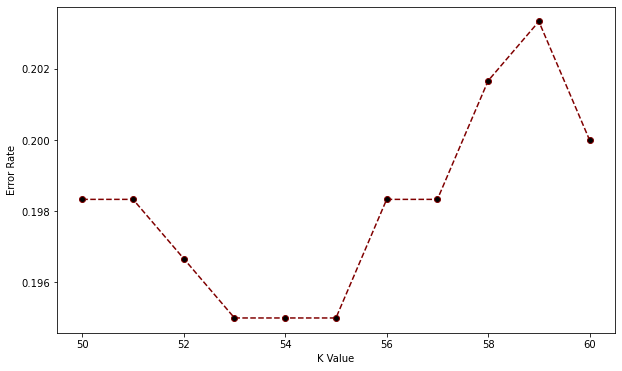

In [43]:
print('Minimum Error: %.3f'%min(error_rate),'is of K Value:',val)

plt.figure(figsize=(10,6))
plt.plot(k,error_rate,ls='--',c='maroon',mfc='black',marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

**<font color=blue > Model Building and Fitting the Data**

In [44]:
model_3 = KNeighborsClassifier(n_neighbors=val)

model_3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=53)

**<font color=blue > Model Performance on Train Data**

In [45]:
m3_train_score = round(model_3.score(x_train,y_train),3)
print('Performance of Model on Train Data: ',m3_train_score)

Performance of Model on Train Data:  0.809


**<font color=blue > Model Performance on Test Data**

In [46]:
m3_test_score = round(model_3.score(x_test,y_test),3)
print('Performance of Model on Train Data: ',m3_test_score)

Performance of Model on Train Data:  0.805


**<font color=blue > Predicting the Data**

In [47]:
pred_3 = model_3.predict(x_test)

pred_3

array([3, 2, 3, 3, 1, 2, 0, 3, 0, 3, 3, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       0, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 0, 3, 2, 3, 2, 2,
       2, 3, 0, 1, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2, 2, 3, 2,
       2, 3, 1, 1, 0, 2, 0, 0, 2, 2, 3, 1, 1, 2, 2, 1, 0, 2, 3, 3, 3, 1,
       0, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       2, 1, 3, 3, 0, 0, 2, 3, 3, 2, 0, 3, 2, 1, 0, 1, 0, 3, 1, 1, 2, 1,
       3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3,
       3, 0, 1, 2, 0, 2, 0, 3, 2, 1, 0, 3, 0, 1, 2, 0, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 3, 2, 1, 1, 1, 2, 0, 2, 3, 1, 3, 1, 0, 2, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 1, 2, 0, 0, 1, 3, 0, 2, 3, 3, 3, 3, 1, 2, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 0, 2, 3, 3, 2, 1, 3,
       1, 3, 2, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 1, 2, 3, 1, 3,
       3, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2,

**<font color=blue > Evaluation of Model**

In [48]:
accu_3,precision_3,f1_3,recall_3 = metric_scores(y_test,pred_3)

print("Accuracy Score: ",accu_3)
print("Precision Score: ",precision_3)
print("F1 Score: ",f1_3)
print("Recall Score: ",recall_3)

Accuracy Score:  0.805
Precision Score:  0.782
F1 Score:  0.792
Recall Score:  0.805


**<font color=blue > Cross Validation**

In [49]:
m3_cv_r2, m3_cv_accu, m3_cv_precision, m3_cv_f1, m3_cv_recall = cross_val_metrics(model_3,skf)

print("R2: ",m3_cv_r2)
print("CV Accuracy Score: ",m3_cv_accu)
print("CV Precision Score: ",m3_cv_precision)
print("CV F1 Score: ",m3_cv_f1)
print("CV Recall Score: ",m3_cv_recall)

R2:  0.839
CV Accuracy Score:  0.802
CV Precision Score:  0.781
CV F1 Score:  0.79
CV Recall Score:  0.802


## **<font color=maroon > Stacking Classifier**

**<font color=blue > Base and Meta Model**

In [50]:
# Base Model
base = [('KNN',KNeighborsClassifier()),('SVC',SVC()),('NB',GaussianNB()),('SVM',SVC())]

meta = LogisticRegression()

**<font color=blue > Model Building and Fitting the Data**

In [51]:
model_4 = StackingClassifier(estimators=base,final_estimator=meta,cv=skf)

model_4.fit(x_train,y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimators=[('KNN', KNeighborsClassifier()), ('SVC', SVC()),
                               ('NB', GaussianNB()), ('SVM', SVC())],
                   final_estimator=LogisticRegression())

**<font color=blue > Model Performance on Train Data**

In [52]:
m4_train_score = round(model_4.score(x_train,y_train),3)
print('Performance of Model on Train Data: ',m4_train_score)

Performance of Model on Train Data:  0.812


**<font color=blue > Model Performance on Test Data**

In [53]:
m4_test_score = round(model_4.score(x_test,y_test),3)
print('Performance of Model on Train Data: ',m4_test_score)

Performance of Model on Train Data:  0.795


**<font color=blue > Predicting the Data**

In [54]:
pred_4 = model_4.predict(x_test)

pred_4

array([3, 2, 3, 3, 1, 2, 0, 3, 0, 3, 3, 3, 0, 2, 0, 2, 2, 2, 3, 0, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       0, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 0, 3, 2, 3, 2, 2,
       2, 3, 0, 1, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 0, 3, 2, 2, 2, 3, 2,
       2, 3, 1, 1, 0, 2, 0, 0, 2, 2, 3, 1, 1, 2, 2, 1, 0, 2, 3, 3, 3, 1,
       0, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       2, 1, 3, 3, 0, 0, 1, 3, 3, 2, 0, 3, 2, 1, 0, 1, 0, 3, 1, 1, 2, 1,
       3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3,
       3, 0, 1, 2, 0, 3, 0, 3, 2, 1, 0, 3, 0, 1, 2, 0, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 3, 2, 1, 1, 1, 2, 0, 2, 3, 1, 3, 1, 0, 2, 3, 1, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 1, 2, 0, 0, 1, 3, 0, 2, 3, 3, 3, 3, 1, 2, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 0, 2, 3, 3, 2, 1, 3,
       1, 3, 2, 0, 3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 1, 2, 3, 1, 3,
       3, 3, 3, 3, 1, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2,

**<font color=blue > Evaluation of Model**

In [55]:
accu_4,precision_4,f1_4,recall_4 = metric_scores(y_test,pred_3)

print("Accuracy Score: ",accu_4)
print("Precision Score: ",precision_4)
print("F1 Score: ",f1_4)
print("Recall Score: ",recall_4)

Accuracy Score:  0.805
Precision Score:  0.782
F1 Score:  0.792
Recall Score:  0.805


**<font color=blue > Cross Validation**

In [56]:
m4_cv_r2, m4_cv_accu, m4_cv_precision, m4_cv_f1, m4_cv_recall = cross_val_metrics(model_4,skf)

print("R2: ",m4_cv_r2)
print("CV Accuracy Score: ",m4_cv_accu)
print("CV Precision Score: ",m4_cv_precision)
print("CV F1 Score: ",m4_cv_f1)
print("CV Recall Score: ",m4_cv_recall)

R2:  0.841
CV Accuracy Score:  0.803
CV Precision Score:  0.781
CV F1 Score:  0.79
CV Recall Score:  0.803


**<font color=blue > Creating DataFrames for Comparing Results**

In [57]:
dic_1 = {'Naive Bayes':[m1_train_score,m1_test_score,accu_1,precision_1,f1_1,recall_1],
         'Random Forest':[m2_train_score,m2_test_score,accu_2,precision_2,f1_2,recall_2],
         'Stacking':[m3_train_score,m3_test_score,accu_3,precision_3,f1_3,recall_3],
         'KNN':[m4_train_score,m4_test_score,accu_4,precision_4,f1_4,recall_4]}
split_compare = pd.DataFrame(dic_1,index=['Train Score','Test Score','Accuracy','Precision','F1','Recall'])
split_compare

,Naive Bayes,Random Forest,Stacking,KNN
Train Score,0.808,0.839,0.809,0.812
Test Score,0.795,0.802,0.805,0.795
Accuracy,0.795,0.802,0.805,0.805
Precision,0.774,0.781,0.782,0.782
F1,0.782,0.789,0.792,0.792
Recall,0.795,0.802,0.805,0.805


In [58]:
dic_2 = {'Naive Bayes':[m1_cv_r2,m1_cv_accu,m1_cv_precision,m1_cv_f1,m1_cv_recall],
         'Random Forest':[m2_cv_r2,m2_cv_accu,m2_cv_precision,m2_cv_f1,m2_cv_recall],
         'Stacking':[m3_cv_r2,m3_cv_accu,m3_cv_precision,m3_cv_f1,m3_cv_recall],
         'KNN':[m4_cv_r2,m4_cv_accu,m4_cv_precision,m4_cv_f1,m4_cv_recall]}
cv_compare = pd.DataFrame(dic_2,index=['R2','Accuracy','Precision','F1','Recall'])
cv_compare

,Naive Bayes,Random Forest,Stacking,KNN
R2,0.841,0.844,0.839,0.841
Accuracy,0.804,0.808,0.802,0.803
Precision,0.784,0.787,0.781,0.781
F1,0.793,0.800,0.790,0.790
Recall,0.804,0.808,0.802,0.803


**<font color=blue > Interpretation**

Based on the Metric Scores and Performance of the Model -
* Naive Bayes Classifier, Stacking Classifier, Random Forest Classifier, and KNN Classifier have closer values of the R2 of both the Train and Test Dataset. So we can say that all models have best fit.
* Naïve Bayes Algorithms have less performance and Metric Scores compared to other Models.
* Random Forest Classifier, Stacking Classifier, and KNN Classifier have similar performance and Metrics Scores i.e. Accuracy Score, Precision Score, F1 Score, and Recall Score. Compared to all Models Random Forest Classifier and Stacking Classifier has similar and high scores.
* Finally we can conclude that Random Forest Classifier has the best fit and have high metric scores. So it was the best model.